In [230]:
#%pip install prov
#%pip install pydot

In [231]:
from prov.model import ProvDocument

In [232]:
# Create a new provenance document
d1 = ProvDocument()  # d1 is now an empty provenance document

In [233]:
# Declaring namespaces for various prefixes used in the example
d1.add_namespace('utility', 'http://https://github_blah/analysis_script/')
d1.add_namespace('data', 'http://github_blah/pp_data/cmip_historical/')
#d1.add_namespace('output', 'http://github_blah/diag_output')
d1.add_namespace('people', 'http://github_blah/user')

<Namespace: people {http://github_blah/user}>

In [234]:
# Entity and agent
e1 = d1.entity('utility:enso.py',{'prov:version': '9d33eef','prov:repo':'gitlab://blah'})
# Agent: nowpeople:Bob
d1.agent('people:jill')

<ProvAgent: people:jill>

In [235]:
d1.wasAttributedTo(e1, 'people:jill')

<ProvAttribution: (utility:enso.py, people:jill)>

In [236]:
d1.entity('data:tauuo.nc', {'prov:label': 'wind stress field', 'prov:type': 'in_ppdata:Dataset'})

<ProvEntity: data:tauuo.nc>

In [237]:
import datetime
d1.entity('data:el_nino.nc', {'prov:label': 'NINO index', 'prov:type': 'out_diagnostics:NetCDF'})
d1.wasDerivedFrom('data:el_nino.nc', 'data:tauuo.nc')
d1.add_namespace('is', 'http://github/operation/is/#')
d1.activity('is:rosie-ppoffline',datetime.datetime.now(), None, {'prov:type': "PPSCRIPT",'prov:repo':'gitlab://rosieapp/pp/','prov:suite_version':'version8d333eeee9933'})
# Usage and Generation
d1.used('utility:enso.py', 'is:rosie-ppoffline')
d1.wasGeneratedBy('data:el_nino.nc', 'is:rosie-ppoffline',datetime.datetime.now())


<ProvGeneration: (data:el_nino.nc, is:rosie-ppoffline)>

In [238]:
# visualize the graph
from prov.dot import prov_to_dot
dot = prov_to_dot(d1)
dot.write_png('enso-prov-demo.png')

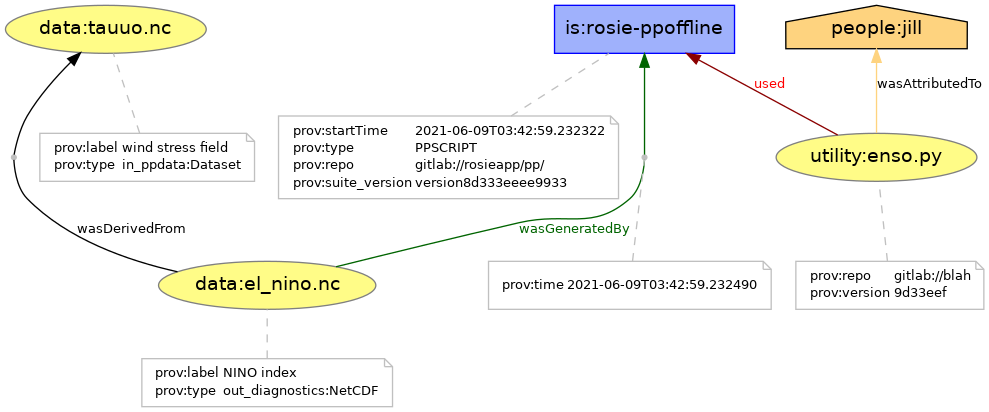

In [239]:
from IPython.display import Image
Image('enso-prov-demo.png')

In [240]:
d2 = ProvDocument.deserialize('enso-prov-demo.json')
d1 == d2 

False

In [241]:
import json

# read file
with open('enso-prov-demo.json', 'r') as myfile:
    data=myfile.read()

# parse file
obj = json.loads(data)

In [242]:
obj

{'prefix': {'analysis_script': 'http://dpdev/analysis_script/',
  'pp_data': 'http://dpdev/pp_data/',
  'diag_output': 'http://dpdev/diag_output',
  'user': 'http://dpdev/user',
  'pp_data_1': 'http://dpdev/pp_data/tauuo/',
  'pp_data_2': 'http://dpdev/pp_data/cmip_historical/'},
 'entity': {'analysis_script:enso.py': {},
  'pp_data:tauuo.nc': {'prov:label': 'wind stress field',
   'prov:type': 'void:Dataset'}},
 'agent': {'user:jill': {}},
 'wasAttributedTo': {'_:id1': {'prov:entity': 'analysis_script:enso.py',
   'prov:agent': 'user:jill'}},
 'wasDerivedFrom': {'_:id2': {'prov:generatedEntity': 'analysis_script:enso.py',
   'prov:usedEntity': 'pp_data:tauuo.nc'}}}

In [243]:
print("input data: " + str(obj['prefix']['pp_data_1']))


input data: http://dpdev/pp_data/tauuo/
